# Business Understanding

## 1. Background

### Peran dalam dataset

Muhammad Fariz Shadiqin : berperan untuk eksplorasi data, mencari insight dan rekomendasi untuk perusahaan WOMart.
Evira Marnolia : berperan dalam mencari insight, rekomendasi, dan membuat grafik  
Yosafat Angga Gilang Pratama : berperan dalam eksplorasi data, mencari insight, membuat grafik, dan rekomendasi  
...

### Permasalahan yang ingin diselesaikan

Perusahaan WOMart, adalah jaringan ritel nutrisi dan suplemen terkemuka yang menawarkan berbagai produk untuk semua kebutuhan kesehatan dan kebugaran. WOMart mengikuti strategi distribusi multi-saluran dengan lebih dari 350 toko ritel yang tersebar di lebih dari 100 kota. Peramalan penjualan yang efektif untuk toko memberikan wawasan penting tentang aliran kas yang akan datang, sehingga WOMart dapat merencanakan aliran kas dengan lebih akurat di tingkat toko.

### Goal yang ingin dicapai

Meningkatkan Akurasi Peramalan Penjualan dengan menggunakan data historis untuk meningkatkan prediksi penjualan dan merencanakan kebutuhan stok dengan lebih baik.

### Objective yang ingin dilakukan

1. Meningkatkan revenue (sales) setiap bulannya.
2. Efisiensi dalam distribusi produk di setiap toko.
3. Penerapan diskon yang tepat dan menguntungkan.

### Business metric untuk mengukur ketercapaian objective

1. Persentase Revenue setiap bulannya (naik 3% - 5%).
2. Frekuensi pembelian produk naik 2%.
3. Rating atau tingkat kepuasan pelanggan di setiap toko

## 2. Insight

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Supplement_Sales_Forecast.csv')

df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [82]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']
nums = ['Holiday', '#Order', 'Sales' ]

In [83]:
df[cats].describe()

,Store_Type,Location_Type,Region_Code,Discount
count,188340,188340,188340,188340
unique,4,5,4,2
top,S1,L1,R1,No
freq,88752,85140,63984,104051


In [84]:
df[nums].describe()

,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000
mean,0.131783,68.205692,42784.327982
std,0.338256,30.467415,18456.708302
min,0.000000,0.000000,0.000000
25%,0.000000,48.000000,30426.000000
50%,0.000000,63.000000,39678.000000
75%,0.000000,82.000000,51909.000000
max,1.000000,371.000000,247215.000000


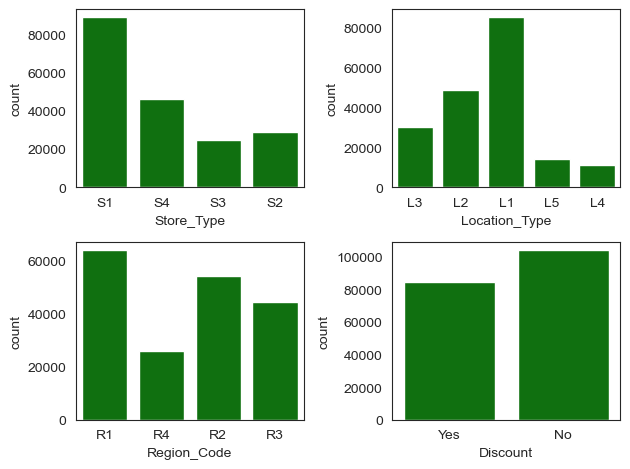

In [85]:
features = cats

sns.set_style("white")
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [62]:
grouped_df = df.groupby(['Store_id', 'Store_Type'])['Sales'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Sales', ascending=False)
sorted_df = sorted_df.reset_index(drop=True)

sorted_df.head(20)

,Store_id,Store_Type,Sales
0,175,S4,52560255.15
1,337,S4,49342417.92
2,126,S4,46351830.51
3,312,S4,44890318.23
4,146,S4,43697690.67
5,160,S4,43171935.06
6,153,S4,40906471.74
7,354,S4,39130625.88
8,173,S4,37387163.25
9,87,S4,36934016.67


C:\Users\ucer\AppData\Local\Temp\ipykernel_11980\1105553284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_stores['Store_Label'] = top_5_stores['Store_id'].astype(str) + ' - ' + top_5_stores['Store_Type']


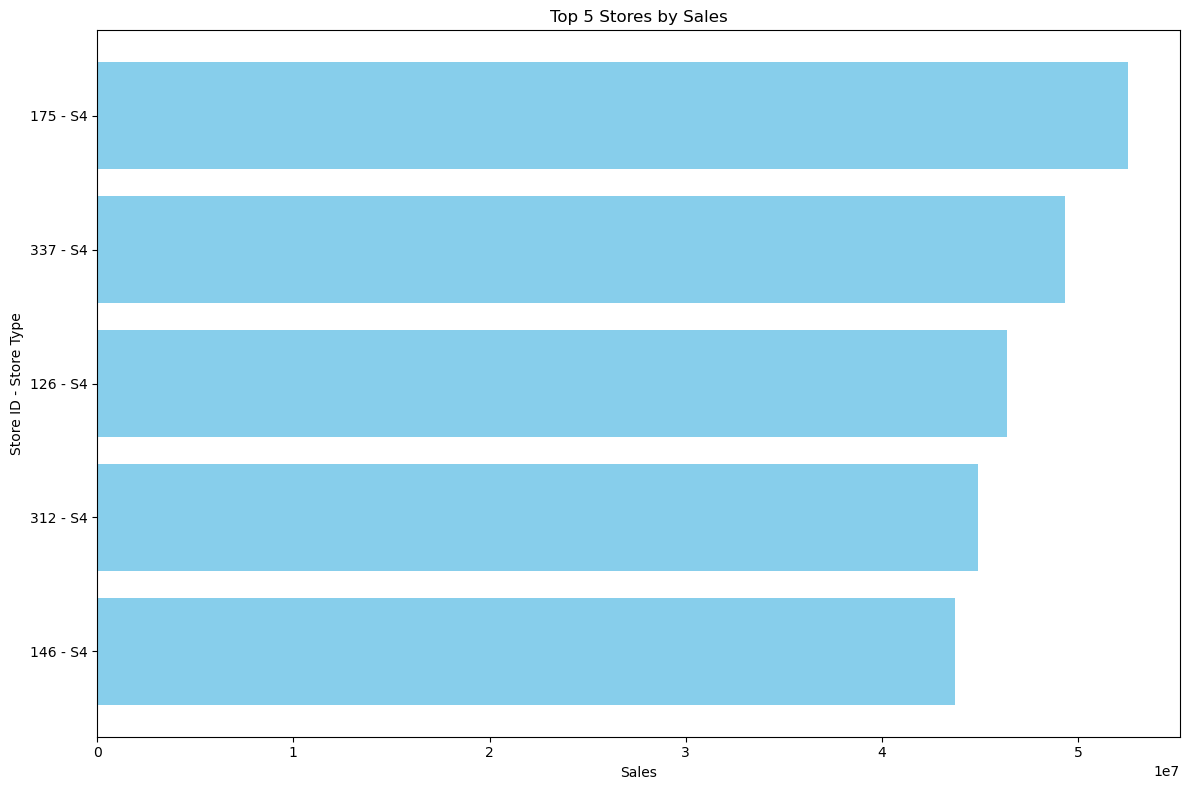

In [63]:
import matplotlib.pyplot as plt

# Filter 5 teratas berdasarkan penjualan
top_5_stores = sorted_df.head(5)
top_5_stores['Store_Label'] = top_5_stores['Store_id'].astype(str) + ' - ' + top_5_stores['Store_Type']

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_5_stores['Store_Label'], top_5_stores['Sales'], color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Store ID - Store Type')
plt.title('Top 5 Stores by Sales')
plt.gca().invert_yaxis()  # Membalikkan urutan agar store dengan sales tertinggi di bagian atas

plt.tight_layout()
plt.show()


In [64]:
grouped_df1 = df.groupby('Store_Type').agg(
    Total_Sales=('Sales', 'sum'),
    Unique_Stores=('Store_id', 'nunique')
).reset_index()

sorted_df1 = grouped_df1.sort_values(by='Total_Sales', ascending=False)
sorted_df1['Efektivitas_Store'] = sorted_df1['Total_Sales'] / sorted_df1['Unique_Stores']
sorted_df1 = sorted_df1.reset_index(drop=True)

sorted_df1

,Store_Type,Total_Sales,Unique_Stores,Efektivitas_Store
0,S1,3.343866e+09,172,1.944108e+07
1,S4,2.752946e+09,89,3.093197e+07
2,S3,1.165658e+09,48,2.428454e+07
3,S2,7.955308e+08,56,1.420591e+07


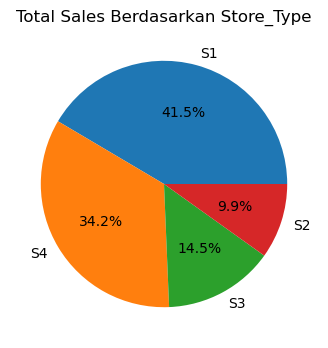

In [75]:
import matplotlib.pyplot as plt

# Pie chart untuk Total Sales berdasarkan Store_Type
plt.figure(figsize=(6, 4))
plt.pie(
    sorted_df1['Total_Sales'], 
    labels=sorted_df1['Store_Type'], 
    autopct='%1.1f%%',
)
plt.title('Total Sales Berdasarkan Store_Type')
plt.show()

In [66]:
grouped_df2 = df.groupby(['Store_id', 'Region_Code'])['Sales'].sum().reset_index()
sorted_df2 = grouped_df2.sort_values(by='Sales', ascending=False)
sorted_df2 = sorted_df2.reset_index(drop=True)

sorted_df2.head(20)

,Store_id,Region_Code,Sales
0,175,R1,52560255.15
1,337,R1,49342417.92
2,126,R2,46351830.51
3,312,R1,44890318.23
4,146,R1,43697690.67
5,160,R1,43171935.06
6,153,R1,40906471.74
7,354,R1,39130625.88
8,173,R1,37387163.25
9,87,R3,36934016.67


C:\Users\ucer\AppData\Local\Temp\ipykernel_11980\2915021258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_stores['Store_Label'] = top_5_stores['Store_id'].astype(str) + ' - ' + top_5_stores['Region_Code']


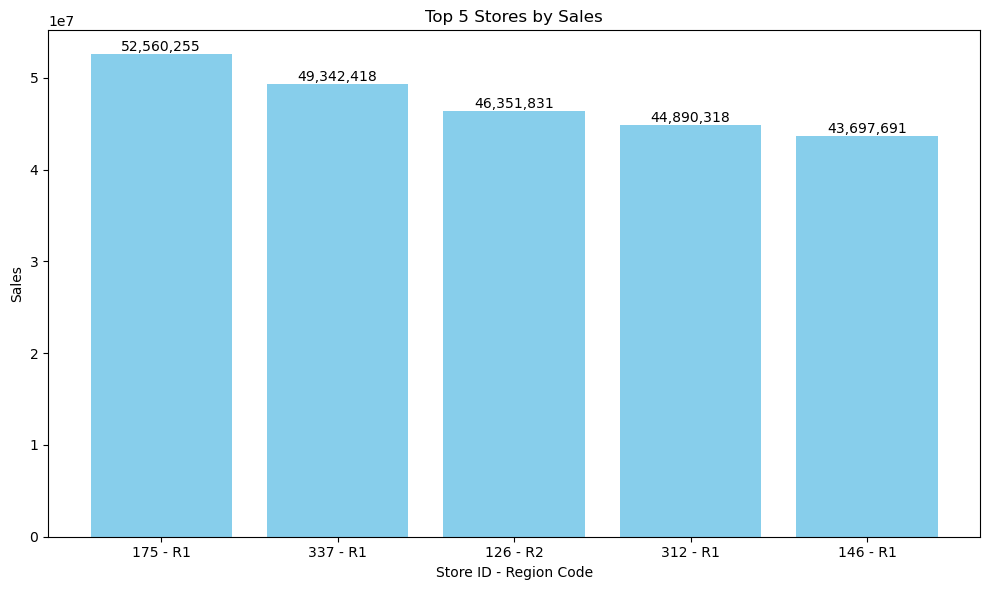

In [67]:
# 5 store teratas berdasarkan sales
top_5_stores = sorted_df2.head(5)
top_5_stores['Store_Label'] = top_5_stores['Store_id'].astype(str) + ' - ' + top_5_stores['Region_Code']

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_stores['Store_Label'], top_5_stores['Sales'], color='skyblue')
plt.xlabel('Store ID - Region Code')
plt.ylabel('Sales')
plt.title('Top 5 Stores by Sales')

# menampilkan value dari tiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [68]:
grouped_df3 = df.groupby('Region_Code').agg(
    Total_Sales=('Sales', 'sum'),
    Unique_Stores=('Store_id', 'nunique')
).reset_index()

sorted_df3 = grouped_df3.sort_values(by='Total_Sales', ascending=False)
sorted_df3['Efektivitas_Region'] = sorted_df3['Total_Sales'] / sorted_df3['Unique_Stores']
sorted_df3 = sorted_df3.reset_index(drop=True)

sorted_df3

,Region_Code,Total_Sales,Unique_Stores,Efektivitas_Region
0,R1,2.992243e+09,124,2.413099e+07
1,R2,2.170172e+09,105,2.066830e+07
2,R3,1.870205e+09,86,2.174657e+07
3,R4,1.025381e+09,50,2.050761e+07


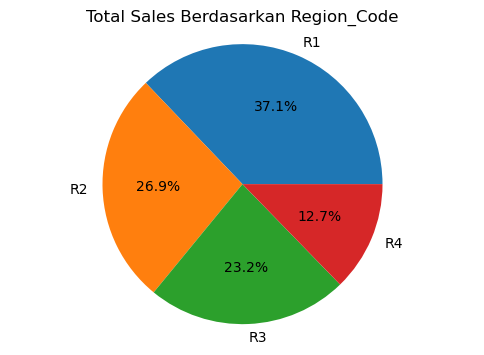

In [69]:
# Plotting pie chart
plt.figure(figsize=(6, 4))
plt.pie(sorted_df3['Total_Sales'], 
        labels=sorted_df3['Region_Code'], 
        autopct='%1.1f%%')

plt.title('Total Sales Berdasarkan Region_Code')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [70]:
grouped_df4 = df.groupby('Location_Type').agg(
    Total_Sales=('Sales', 'sum'),
    Unique_Stores=('Store_id', 'nunique')
).reset_index()

sorted_df4 = grouped_df4.sort_values(by='Total_Sales', ascending=False)
sorted_df4['Efektivitas_Location'] = sorted_df4['Total_Sales'] / sorted_df4['Unique_Stores']
sorted_df4 = sorted_df4.reset_index(drop=True)

sorted_df4

,Location_Type,Total_Sales,Unique_Stores,Efektivitas_Location
0,L1,3.529359e+09,165,2.139006e+07
1,L2,2.872964e+09,94,3.056344e+07
2,L3,9.897865e+08,58,1.706529e+07
3,L5,3.509163e+08,27,1.299690e+07
4,L4,3.149745e+08,21,1.499879e+07


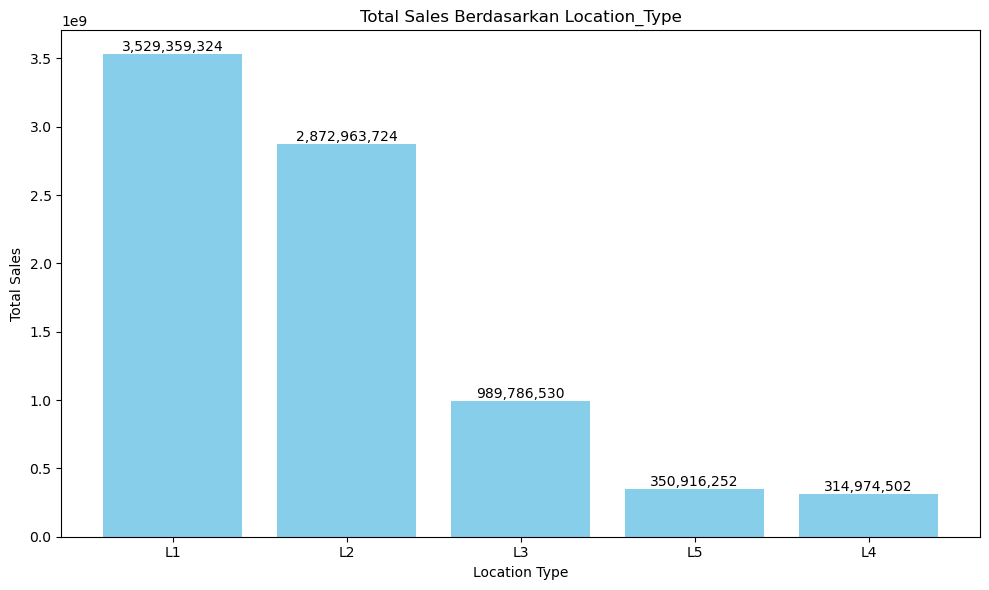

In [76]:
# Plotting bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_df4['Location_Type'], sorted_df4['Total_Sales'], color='skyblue')

plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales Berdasarkan Location_Type')

# Menampilkan value dari setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Rata-rata Jumlah Pesanan Berdasarkan Status Diskon:
Discount
No     61.806153
Yes    76.105637
Name: #Order, dtype: float64


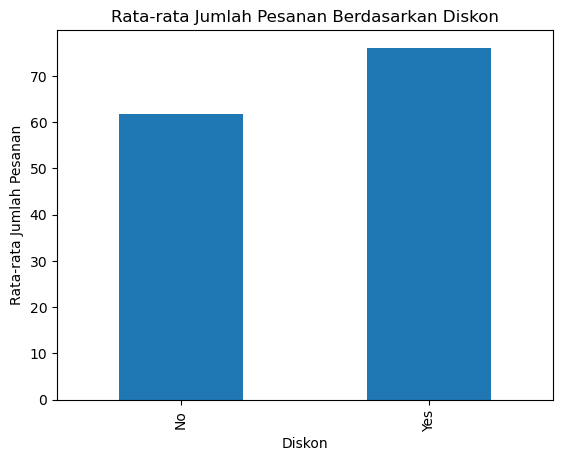

In [72]:
average_orders_discount = df.groupby('Discount')['#Order'].mean()

print("Rata-rata Jumlah Pesanan Berdasarkan Status Diskon:")
print(average_orders_discount)

average_orders_discount.plot(kind='bar', title='Rata-rata Jumlah Pesanan Berdasarkan Diskon')
plt.xlabel('Diskon')
plt.ylabel('Rata-rata Jumlah Pesanan')
plt.show()

Rata-rata Penjualan Berdasarkan Status Diskon:
Discount
No     37403.679678
Yes    49426.497620
Name: Sales, dtype: float64


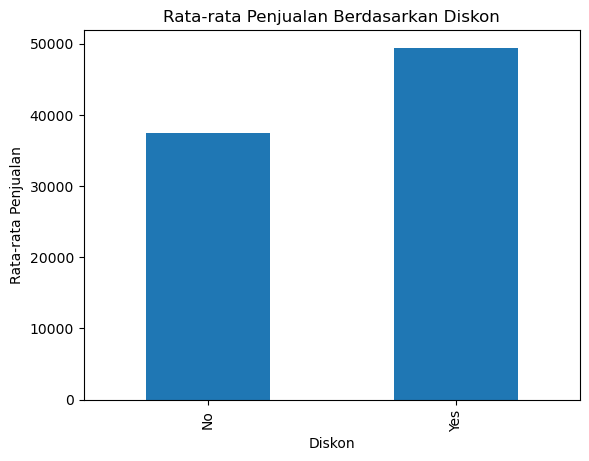

In [73]:
average_sales_discount = df.groupby('Discount')['Sales'].mean()

print("Rata-rata Penjualan Berdasarkan Status Diskon:")
print(average_sales_discount)

average_sales_discount.plot(kind='bar', title='Rata-rata Penjualan Berdasarkan Diskon')
plt.xlabel('Diskon')
plt.ylabel('Rata-rata Penjualan')
plt.show()

In [77]:
# Menghitung total jumlah order berdasarkan nilai Holiday dan Location_Type
total_orders = df.groupby(['Location_Type', 'Holiday'])['#Order'].sum().reset_index()

# Menampilkan total orders
print("Total Orders per Location Type by Holiday Status:")
print(total_orders)

Total Orders per Location Type by Holiday Status:
  Location_Type  Holiday   #Order
0            L1        0  4942664
1            L1        1   614078
2            L2        0  4093441
3            L2        1   507234
4            L3        0  1414631
5            L3        1   176250
6            L4        0   455939
7            L4        1    57536
8            L5        0   519020
9            L5        1    65067


### Kumpulan insight

1. Dilihat pada bagian tabel sorted.df, top 20 'Store_Id' yang diurutkan berdasarkan total Sales (revenue) berasal dari 'Store_Type' S4. Hal ini menunjukkan bahwa 'Store_Type' S4 memiliki kontribusi yang cukup besar dalam perolehan revenue dari perusahaan WOMart.
2. Sorted.df1 menunjukkan betapa efektifnya 'Store_Type' S4 dalam memaksimalkan potensi yang ada, walaupun memang secara total jumlah revenue yang dihasilkan tidak sebanyak 'Store_Type' S1.
3. Dilihat pada bagian tabel sorted.df2, top 20 'Store_Id' didominasi dari 'Region_Code' R1. Hal ini menunjukkan bahwa 'Region_Code' R1 memiliki kontribusi yang cukup besar dalam perolehan revenue dari perusahaan WOMart.
4. Sorted.df3 menunjukkan betapa efektifnya 'Region_Code' R1 dalam memaksimalkan potensi yang ada, selain itu juga 'Region_Code' R1 menghasilkan 'Total_Sales' yang paling besar dibandingkan dengan 'Region_Code' lainnya.
5. Sorted.df4 menunjukkan bahwa 'Location_Type' L1 menghasilkan 'Total_Sales' yang paling besar dibandingkan dengan 'Location_Type' lainnya. Sorted.df4 juga menunjukkan bahwa 'Location_Type' L2 mempunya efektivitas pengelolaan potensi yang terbesar.
6. Rata-rata jumlah pesanan meningkat pada hari-hari dengan diskon. Hal ini menunjukkan bahwa pelanggan lebih terdorong untuk membeli ketika ada diskon, yang mengindikasikan sensitivitas pelanggan terhadap harga. Rata-rata penjualan 'Sales' juga menunjukkan peningkatan pada hari-hari dengan diskon. Ini berarti diskon tidak hanya menarik lebih banyak pesanan, tetapi juga meningkatkan total pendapatan, menunjukkan bahwa diskon dapat mendorong lebih banyak pembelian tanpa mengurangi nilai transaksi secara signifikan.
7. Pada masing-masing Location_Type, jumlah order saat tidak holiday menunjukkan angka yang lebih tinggi dibandingkan dengan saat holiday. Hal ini menunjukkan bahwa konsumen cenderung lebih aktif berbelanja pada hari-hari biasa. Hal ini mungkin disebabkan oleh berbagai faktor, seperti kebiasaan belanja yang lebih stabil dan ketersediaan waktu yang lebih banyak untuk melakukan transaksi. Saat hari libur, orang sering terlibat dalam kegiatan lain, seperti berkumpul dengan keluarga atau berlibur, sehingga perhatian mereka terhadap belanja berkurang. 

## 3. Business recommendation

1. Untuk meningkatkan jumlah Sales atau revenue, 'Store_Type' lain mungkin harus bisa mencontoh apa-apa saja yang perlu ditingkatkan berkaca dari 'Store_Type' S1. Begitupun juga dengan 'Region_Code' dan 'Location_Type' lain yang dapat berkaca ke masing-masing 'Region_Code' R1 dan 'Location_Type' L2 dalam memaksimalkan potensi yang ada.
2. Untuk meningkatkan jumlah pesanan secara efektif, mungkin dapat dengan mengoptimalkan strategi diskon pada tipe toko yang menunjukkan respons paling tinggi terhadap diskon (misalnya, Store_Type S1). Tipe toko yang kurang merespons diskon bisa diberikan promosi alternatif, seperti program loyalitas atau paket bundling. Mungkin juga dapat mempertimbangkan untuk meningkatkan frekuensi diskon di hari-hari dengan volume penjualan rendah untuk menjaga tingkat penjualan tetap stabil.
3. WOMart sebaiknya mengembangkan strategi pemasaran yang lebih masif untuk periode non-holiday, seperti memberikan promosi khusus, bundling produk, atau program loyalitas yang menarik. Ini bertujuan untuk mempertahankan momentum penjualan dan mendorong konsumen untuk terus melakukan pembelian. Selain itu, WOMart perlu mengeksplorasi cara untuk membuat pengalaman belanja di hari-hari libur lebih menarik, misalnya dengan mengadakan event, menawarkan diskon eksklusif, atau memperkenalkan produk baru yang sesuai dengan tema liburan. 